# Matts Notebook

In [102]:
#Import the relevant packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score,recall_score,precision_score,\
                            f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris

In [2]:
#Load Iris Data to test functions
iris = load_iris() 
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# petal length and width features
feature_used = iris.feature_names[2:]
X = iris.data[:, 2:] 
y = iris.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train.shape, X_test.shape

((120, 2), (30, 2))

## Building functions for project

In [4]:
#Standard Scaler
def SS(X_train,X_test):
    ss=StandardScaler()
    ss.fit_transform(X_train)
    ss.fit(X_test)

In [90]:
#Logistic Regression
def logreg(X_train,X_test,y_train,y_test,cv=5):
    grid = {
    'penalty': ['l1','l2','elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
    grid_logreg=LogisticRegression(random_state=42)
    grid_logreg.fit(X_train,y_train)
    gs = GridSearchCV(estimator=grid_logreg, param_grid=grid, cv=5, scoring='neg_log_loss')
    gs.fit(X_train, y_train)
    logreg_params=gs.best_params_
    logreg_penalty=logreg_params['penalty']
    print(f'Penalty: {logreg_penalty}')
    logreg_solver=logreg_params['solver']
    print(f'Solver: {logreg_solver}')
    #Instantiate logistic regression
    log=LogisticRegression(random_state=42,penalty=logreg_penalty,solver=logreg_solver)
    #Fit it on train data
    log.fit(X_train,y_train)
    #Create y_pred using test data
    y_pred=log.predict(X_test)
    
    #Use cross_val_score with cv folds
    cv_results = cross_val_score(log, X_train, y_train, cv=cv)
    print(f'Cross val mean score: {cv_results.mean()}')
    
    #Examine accuracy,recall,precision and f1 scores
    acc_score=accuracy_score(y_test,y_pred)
    print(f'accuracy score: {acc_score}')
    #rec_score=recall_score(y_test,y_pred)
    #print(f'recall score: {rec_score}')
    #prec_score=precision_score(y_test,y_pred)
   # print(f'precision score: {prec_score}')
   # f1_score=f1_score(y_test,y_pred)
   # print(f'f1 score: {f1_score}')
    
    #Plot an roc curve, only works with binary data
    #plot_roc_curve(log, X_train, y_train);
    
    #Plot and examine confusion matrix
    plot_confusion_matrix(log, X_train, y_train);
    

/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got

/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/matthewreinhart/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elast

Penalty: l2
Solver: lbfgs
Cross val mean score: 0.9666666666666668
accuracy score: 0.9666666666666667


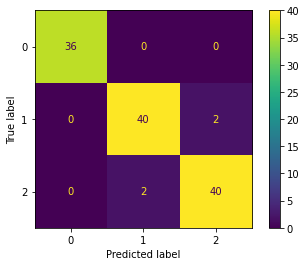

In [91]:
logreg(X_train,X_test,y_train,y_test)

In [7]:
#for index in range(1,33,2):
    #knn_model = KNeighborsClassifier(n_neighbors=index)
    #knn_log_loss = -1 * cross_val_score(knn_model, X_train,
                                       # y_train, scoring="neg_log_loss").mean()
    #print(f"# of Neighbors: {index}, Log Loss Score: {knn_log_loss}")

In [66]:
#def low_log_loss():
#knn_dict={}
#for index in range(1,33,2):
       # knn_model = KNeighborsClassifier(n_neighbors=index)
        #knn_log_loss = -1 * cross_val_score(knn_model, X_train,
                                    #    y_train, scoring="neg_log_loss").mean()
        #knn_dict[index]=(knn_log_loss)
#min_knn= min(knn_dict.values())
#low_key = list(knn_dict.keys())[list(knn_dict.values()).index(min_knn)]
#print(low_key)
#print(min_knn)

### Examine Gridsearch outside function

In [61]:
grid = {
    'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23,25],
    'metric': ['minkowski', 'manhattan'],
    'weights': ['uniform', 'distance']
}

In [62]:
grid_knn=KNeighborsClassifier()
grid_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [63]:
gs = GridSearchCV(estimator=grid_knn, param_grid=grid, cv=5,scoring='neg_log_loss')

In [64]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25],
                         'weights': ['uniform', 'distance']},
             scoring='neg_log_loss')

In [65]:
KNN_params=gs.best_params_
KNN_neighbors=KNN_params['n_neighbors']
KNN_neighbors

7

In [29]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001245,0.000426,0.011885,0.005479,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.958333,1.000000,1.0,0.916667,1.000000,0.975000,0.033333,1
1,0.001942,0.002063,0.003972,0.003508,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.958333,1.000000,1.0,0.916667,1.000000,0.975000,0.033333,1
2,0.004346,0.005807,0.006191,0.002710,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.958333,0.958333,1.0,0.916667,1.000000,0.966667,0.031180,5
3,0.001588,0.000947,0.004258,0.003662,minkowski,3,distance,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.916667,0.958333,1.0,0.916667,1.000000,0.958333,0.037268,19
4,0.001957,0.001789,0.007879,0.004216,minkowski,5,uniform,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.958333,0.958333,1.0,0.916667,1.000000,0.966667,0.031180,5
5,0.003228,0.001923,0.002820,0.001919,minkowski,5,distance,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.916667,0.958333,1.0,0.916667,1.000000,0.958333,0.037268,19
6,0.002942,0.002523,0.008396,0.005828,minkowski,7,uniform,"{'metric': 'minkowski', 'n_neighbors': 7, 'wei...",0.958333,0.958333,1.0,0.875000,1.000000,0.958333,0.045644,14
7,0.029944,0.046339,0.009358,0.010869,minkowski,7,distance,"{'metric': 'minkowski', 'n_neighbors': 7, 'wei...",0.916667,0.958333,1.0,0.916667,1.000000,0.958333,0.037268,19
8,0.001591,0.001041,0.018279,0.015277,minkowski,9,uniform,"{'metric': 'minkowski', 'n_neighbors': 9, 'wei...",0.958333,0.958333,1.0,0.916667,1.000000,0.966667,0.031180,5
9,0.001363,0.001226,0.008106,0.009556,minkowski,9,distance,"{'metric': 'minkowski', 'n_neighbors': 9, 'wei...",0.916667,0.958333,1.0,0.916667,1.000000,0.958333,0.037268,19


In [48]:
    #def low_log_loss():
   # knn_dict={}
   # for index in range(1,33,2):
       # knn_model = KNeighborsClassifier(n_neighbors=index)
       # knn_log_loss = -1 * cross_val_score(knn_model, X_train,
                                       # y_train, scoring="neg_log_loss").mean()
       # knn_dict[index]=(knn_log_loss)
   # min_knn= min(knn_dict.values())
    #low_key = list(knn_dict.keys())[list(knn_dict.values()).index(min_knn)]
   # knn=KNeighborsClassifier(n_neighbors=low_key,metric=metric)

### KNN

In [92]:
#K nearest neighbors
def KNN(X_train,X_test,y_train,y_test,metric='minkowski',cv=5):
    grid = {
    'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23,25],
    'metric': ['minkowski', 'manhattan'],
    'weights': ['uniform', 'distance']}
    grid_knn=KNeighborsClassifier()
    grid_knn.fit(X_train,y_train)
    gs = GridSearchCV(estimator=grid_knn, param_grid=grid, cv=5, scoring='neg_log_loss')
    gs.fit(X_train, y_train)
    KNN_params=gs.best_params_
    KNN_neighbors=KNN_params['n_neighbors']
    print(f'Number of Neighbors: {KNN_neighbors}')
    KNN_metric=KNN_params['metric']
    print(f'Metric: {KNN_metric}')
    KNN_weights=KNN_params['weights']
    print(f'Weights: {KNN_weights}')
    
    #Instantiate K nearest neighbors
    knn=KNeighborsClassifier(n_neighbors=KNN_neighbors,metric=KNN_metric,weights=KNN_weights)
    knn.fit(X_train,y_train)
    #Create y_pred using test data
    y_pred=knn.predict(X_test)
    #Use cross_val_score with cv folds
    cv_results = cross_val_score(knn, X_train, y_train, cv=cv)
    print(f'Cross val mean score: {cv_results.mean()}')
    
    #Examine accuracy,recall,precision and f1 scores
    acc_score=accuracy_score(y_test,y_pred)
    print(f'accuracy score: {acc_score}')
    #rec_score=recall_score(y_test,y_pred)
    #print(f'recall score: {rec_score}')
    #prec_score=precison_score(y_test,y_pred)
    #print(f'precision score: {prec_score}')
    #f1_score=f1_score(y_test,y_pred)
   # print(f'f1 score: {f1_score}')
    
    #Plot an roc curve
    #plot_roc_curve(knn, X_train, y_train);
    
    
    #Plot and examine confusion matrix
    plot_confusion_matrix(knn, X_train, y_train);
    

Number of Neighbors: 7
Metric: manhattan
Weights: uniform
Cross val mean score: 0.9666666666666668
accuracy score: 0.9666666666666667


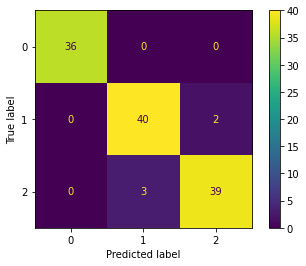

In [93]:
KNN(X_train,X_test,y_train,y_test)

### Decision Tree

In [83]:
#Decision Trees
def dtree(X_train,X_test,y_train,y_test,cv=5):
    grid = {
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'criterion': ['gini', 'entropy']}
    grid_dt=DecisionTreeClassifier()
    grid_dt.fit(X_train,y_train)
    gs = GridSearchCV(estimator=grid_dt, param_grid=grid, cv=5, scoring='neg_log_loss')
    gs.fit(X_train, y_train)
    dt_params=gs.best_params_
    dt_max_depth=dt_params['max_depth']
    print(f'Max Depth: {dt_max_depth}')
    dt_min_samp=dt_params['min_samples_split']
    print(f'Min Sample Split: {dt_min_samp}')
    dt_criterion=dt_params['criterion']
    print(f'criterion: {dt_criterion}')
    #Instantiate decision tree
    Dtree=DecisionTreeClassifier(max_depth=dt_max_depth,criterion=dt_criterion,min_samples_split=dt_min_samp,
                                 random_state=42)
    #Fit it on train data
    Dtree.fit(X_train,y_train)
    #Create y_pred using test data
    y_pred=Dtree.predict(X_test)
    
    #Use cross_val_score with cv folds
    cv_results = cross_val_score(Dtree, X_train, y_train, cv=cv)
    print(f'Cross val mean score: {cv_results.mean()}')
    
    #Examine accuracy,recall,precision and f1 scores
    acc_score=accuracy_score(y_test,y_pred)
    print(f'accuracy score: {acc_score}')
    #rec_score=recall_score(y_test,y_pred)
    #print(f'recall score: {rec_score}')
    #prec_score=precison_score(y_test,y_pred)
    #print(f'precision score: {prec_score}')
    #f1_score=f1_score(y_test,y_pred)
    #print(f'f1 score: {f1_score}')
    
    #Plot an roc curve
    #plot_roc_curve(Dtree, X_train, y_train);
    
    #Plot and examine confusion matrix
    plot_confusion_matrix(Dtree, X_train, y_train);

Max Depth: 2
Min Sample Split: 2
criterion: gini
Cross val mean score: 0.9666666666666668
accuracy score: 0.9333333333333333


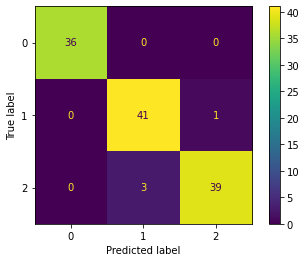

In [84]:
dtree(X_train,X_test,y_train,y_test)

### Random Forest

In [97]:
n_list=list(range(50,150))


In [119]:
def random_forest(X_train,X_test,y_train,y_test,cv=5):
    grid = {
    'n_estimators': n_list,
    'criterion': ['gini', 'entropy']}
    grid_rf=RandomForestClassifier()
    grid_rf.fit(X_train,y_train)
    gs = GridSearchCV(estimator=grid_rf, param_grid=grid, cv=5, scoring='neg_log_loss')
    gs.fit(X_train, y_train)
    rf_params=gs.best_params_
    rf_n_estimators=rf_params['n_estimators']
    print(f'Number Estimators: {rf_n_estimators}')
    rf_criterion=rf_params['criterion']
    print(f'criterion: {rf_criterion}')
    #Instantiate decision tree
    rforest=RandomForestClassifier(n_estimators=rf_n_estimators,criterion=rf_criterion)
    #Fit it on train data
    rforest.fit(X_train,y_train)
    #Create y_pred using test data
    y_pred=rforest.predict(X_test)
    
    #Use cross_val_score with cv folds
    cv_results = cross_val_score(rforest, X_train, y_train, cv=cv)
    print(f'Cross val mean score: {cv_results.mean()}')
    #print forest score
    score=rforest.score(X_test,y_test)
    print(f'Random Forest Score: {score}')
    
    #Examine accuracy,recall,precision and f1 scores
    #acc_score=accuracy_score(y_test,y_pred)
    #print(f'accuracy score: {acc_score}')
    #rec_score=recall_score(y_test,y_pred)
    #print(f'recall score: {rec_score}')
    #prec_score=precison_score(y_test,y_pred)
    #print(f'precision score: {prec_score}')
    #f1_score=f1_score(y_test,y_pred)
    #print(f'f1 score: {f1_score}')
    
    #Plot an roc curve
    #plot_roc_curve(Dtree, X_train, y_train);
    
    #Plot and examine confusion matrix
    plot_confusion_matrix(rforest, X_train, y_train);

Number Estimators: 55
criterion: entropy
Cross val mean score: 0.9583333333333333
Random Forest Score: 0.9666666666666667


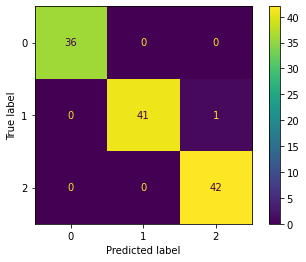

In [120]:
# Takes 5 minutes and 30 seconds to run
random_forest(X_train,X_test,y_train,y_test,cv=5)

### Bagging Classifier

In [123]:
#Bagging
def bagged(X_train,X_test,y_train,y_test,cv=5,max_depth=3,criterion='gini',n_estimators=10):

    #Instantiate decision tree
    bagging=BaggingClassifier(DecisionTreeClassifier(max_depth=max_depth,criterion=criterion),
                              n_estimators=n_estimators)
    #Fit it on train data
    bagging.fit(X_train,y_train)
    #Create y_pred using test data
    y_pred=bagging.predict(X_test)
    
    #Use cross_val_score with cv folds
    cv_results = cross_val_score(bagging, X_train, y_train, cv=cv)
    print(f'Cross val mean score: {cv_results.mean()}')
    #print forest score
    score=bagging.score(X_test,y_test)
    print(f'Random Forest Score: {score}')
    
    #Examine accuracy,recall,precision and f1 scores
    #acc_score=accuracy_score(y_test,y_pred)
    #print(f'accuracy score: {acc_score}')
    #rec_score=recall_score(y_test,y_pred)
    #print(f'recall score: {rec_score}')
    #prec_score=precison_score(y_test,y_pred)
    #print(f'precision score: {prec_score}')
    #f1_score=f1_score(y_test,y_pred)
    #print(f'f1 score: {f1_score}')
    
    #Plot an roc curve
    #plot_roc_curve(Dtree, X_train, y_train);
    
    #Plot and examine confusion matrix
    plot_confusion_matrix(bagging, X_train, y_train);

Cross val mean score: 0.9583333333333333
Random Forest Score: 0.9333333333333333


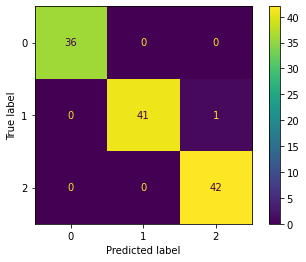

In [124]:
bagged(X_train,X_test,y_train,y_test,cv=5)